In [1]:
from representations.sequentialembedding import SequentialEmbedding
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline

In [2]:
fiction_embeddings = SequentialEmbedding.load("embeddings/eng-fiction-all_sgns", range(1850, 2000, 10))

For example, we can compute the cosine similarity between the words "gay" and "lesbian" over time. We see that, starting at around the 1960s, the similarity skyrocketed, signalling the sudden shift in meaning that occured during this time.

(0, 1)

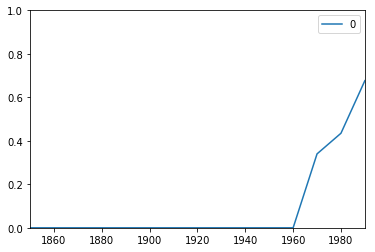

In [17]:
def make_timesim_df(word1, word2):
    time_sims = fiction_embeddings.get_time_sims(word1, word2)
    years = []
    sims = []
    for year, sim in time_sims.iteritems():
        years.append(year)
        sims.append(sim)

    df = pd.DataFrame(sims, years)
    return(df)
    
df = make_timesim_df("gay", "lesbian")
ax = df.plot()
ax.set_ylim(0, 1)

We can repeat this process with historical technological metaphors like "body" and "engine" and "computer" and "mind" to see when links occured and how strong they were. 

(0, 1)

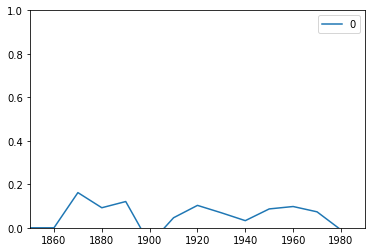

In [15]:
df = make_timesim_df("body", "engine")
ax = df.plot()
ax.set_ylim(0, 1)

(0, 1)

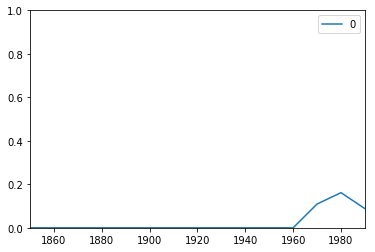

In [14]:
df = make_timesim_df("computer", "mind")
ax = df.plot()
ax.set_ylim(0, 1)

In [93]:
years = range(1850, 2000, 10)
for year in years:
    words = fiction_embeddings.get_seq_closest("motor", year, n = 20)
    print(year)
    print(words)
    print("---------")

1850
[u'\xf6sszeg', u'\xe1ria', u'\xe4kta', u'\xe1ll\xedt\xe1s', u'\xedntimo', u'\xe1rfolyam', u'\xe4nda', u'\xfczlet', u'\xe1t', u'\xf6gonblick', u'\u0131\u015f\u0131l', u'\xe1tv\xe1lt\xe1si', u'\xe9rint', u'\xe9rtelem', u'\xe1llhatatosan', u'\xeaxito', u'\xe7ok', u'\xe9ppen', u'\xf6sszefoglal', u'\xe9brio']
---------
1860
[u'\xf6sszeg', u'\xe1ria', u'\xe4kta', u'\xe1ll\xedt\xe1s', u'\xedntimo', u'\xe1rfolyam', u'\xe4nda', u'\xfczlet', u'\xe1t', u'\xf6gonblick', u'\u0131\u015f\u0131l', u'\xe1tv\xe1lt\xe1si', u'\xe9rint', u'\xe9rtelem', u'\xe1llhatatosan', u'\xeaxito', u'\xe7ok', u'\xe9ppen', u'\xf6sszefoglal', u'\xe9brio']
---------
1870
[u'\xf6sszeg', u'\xe1ria', u'\xe4kta', u'\xe1ll\xedt\xe1s', u'\xedntimo', u'\xe1rfolyam', u'\xe4nda', u'\xfczlet', u'\xe1t', u'\xf6gonblick', u'\u0131\u015f\u0131l', u'\xe1tv\xe1lt\xe1si', u'\xe9rint', u'\xe9rtelem', u'\xe1llhatatosan', u'\xeaxito', u'\xe7ok', u'\xe9ppen', u'\xf6sszefoglal', u'\xe9brio']
---------
1880
[u'\xf6sszeg', u'\xe1ria', u'\xe

(0, 1)

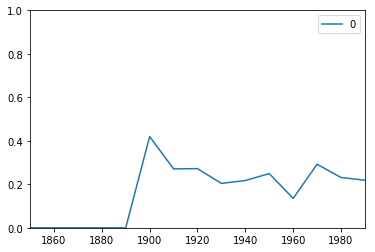

In [101]:
df = make_timesim_df("motor", "conductor")
ax = df.plot()
ax.set_ylim(0, 1)

In [99]:
words = fiction_embeddings.get_seq_closest("motor", 1990, n = 50)
D = []
for word1 in words:
    row = []
    for word2 in words:
        row.append(fiction_embeddings.get_embed(1990).similarity(word1, word2))
    D.append(row)

D = np.array(D)
print(D.shape)

(50, 50)


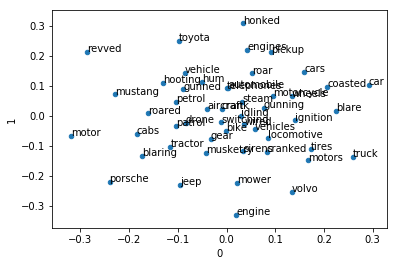

In [100]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, dissimilarity="precomputed")
results = mds.fit(D)
coords = results.embedding_
df = pd.DataFrame(coords, words)
df
ax = df.plot.scatter(x = 0, y = 1)
for i, txt in enumerate(words):
    ax.annotate(txt, (df[0][i], df[1][i]))